# Entropy

**Entropy** reflects the uncertainty of a probability distribution. It is a quantitive estimation of the amount of information stored in the distribution.

## Entropy of discrete distributions

If $p_k = \mathbb P(\xi = x_k)$ is pmd of a discrete random variable $\xi$ then its entropy is calculated as

$$
    \mathbb H\xi =  -\mathbb E \big(\log p(\xi)\big) = -\sum\limits_k p_k \log p_k.
$$

The logarithm base can be any number greater than $1$. In practice two bases are used:

* binary logarithm, then $\mathbb H\xi$ is measured in **bits**
* natrural lograrithm, then $\mathbb H\xi$ is measured in **nats**

```{note}
When dealing with entopy, often expression of the form $0\cdot \log 0$ may arise. By definition it is settled to $0$.
```

### Entropy of $\mathrm{Bern}(p)$

If $\xi \sim \mathrm{Bern}(p)$ then

$$
    \mathbb H\xi = -(1 - p)\log(1 - p) - p\log p.
$$

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, geom, entropy, poisson

%config InlineBackend.figure_formats = ['svg']

def plot_bern_entropy(save_fig=False):
    legend_size = 18
    text_size = 24
    eps = 0.01
    fig, ax = plt.subplots(figsize=(9, 5))
    xs = np.linspace(0.001, 0.999, num=999)
     
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    ax.text(1.05, -.05, r"$p$", size=text_size)
    ax.text(0.01, 1.03, r"$h(p)$", size=text_size)
    
    arrow_fmt = dict(markersize=6, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
    ax.plot(xs, -xs*np.log(xs) - (1-xs)*np.log(1 - xs), c='r', lw=2, label= r'$-p\ln p - (1-p)\ln(1-p)$')
    ax.plot(xs, -xs*np.log2(xs) - (1-xs)*np.log2(1 - xs), c='b', lw=2, label= r'$-p\log_2 p - (1-p)\log_2(1-p)$')
    ax.legend(loc=(0.27, 0.1), fontsize=legend_size);
    ax.grid(ls=':')
    ax.set_title(r"$H[\xi] = h(p)$ for $\xi\sim \mathrm{Bern}(p)$", size=text_size)
    yticks = [round(float(x), 1) for x in np.linspace(0, 1, num=11)]
    xticks = [round(float(x), 1) for x in np.linspace(0, 1, num=11)]
    ax.set_yticks(yticks[1:]);
    ax.set_xticks(xticks[1:])
    ax.set_yticklabels(yticks[1:], size=legend_size)
    ax.set_xticklabels(xticks[1:], size=legend_size);
    if save_fig:
        plt.savefig("entropy_bern.svg")

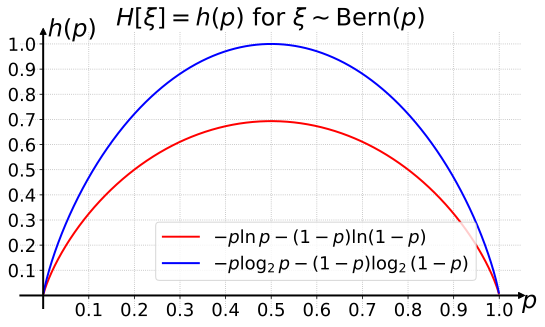

In [59]:
plot_bern_entropy()

Минимальное значение (нулевое) энтропия принимает при $p = 0$ или $p=1$. Исход такого вырожденного эксперимента заранее известен, поэтому наблюдение значения случайной величины не несёт никакой новой информации.

Максимальное значение энтропии достигается в точке $\frac12$, что вполне соответствует тому, что при $p=\frac12$ предсказать исход эксперимента сложнее всего.

### Entropy of $\mathrm{Bin}(p)$

If $\xi \sim \mathrm{Bin}(p)$, then

$$
    \mathbb H\xi = -\sum\limits_{k=0}^n \binom n k p^k (1-p)^{n-k}\Big(\log \binom nk + k\log p + (n-k) \log(1-p)\Big).
$$

It can hardly be calculated in closed form.

In [31]:
def plot_binomial_entropy(ns):
    ps = np.linspace(0.0001, 0.9999, num=1000)
    colors = ['r', 'b', 'g', 'm', 'c', 'brown', 'orange']
    for i, n in enumerate(ns):
        plt.plot(ps, binom(n, ps).entropy(), lw=2, c=colors[i], label=r"$n={}$".format(n))
    plt.title("Entropy of binomial distribution")
    plt.grid(ls=":")
    plt.xlabel("p")
    plt.axhline(c='k', alpha=0.7)
    plt.axvline(c='k', alpha=0.7)
    plt.legend();

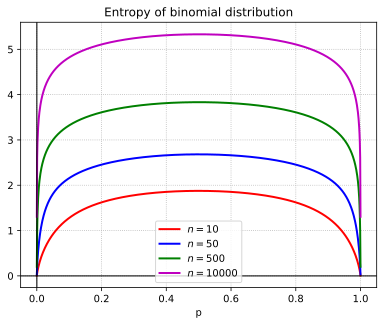

In [33]:
plot_binomial_entropy([10, 50, 500, 10000])

### Entropy of $\mathrm{Geom}(p)$

If $\xi \sim \mathrm{Geom}(p)$, then

$$
    \mathbb H\xi = -\sum\limits_{k=1}^\infty q^{k-1}p\big(\log p + (k-1)\log q\big).
$$

Unlike for the binomial disribution, this entropy can be easily calculated in closed form (see exercises below).

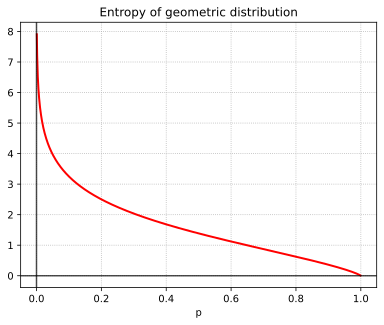

In [36]:
def plot_geometric_entropy():
    ps = np.linspace(0.001, 0.999, num=999)
    plt.plot(ps, geom.entropy(ps), lw=2, c='r')
    plt.title("Entropy of geometric distribution")
    plt.grid(ls=":")
    plt.xlabel("p")
    plt.axhline(c='k', alpha=0.7)
    plt.axvline(c='k', alpha=0.7)
    
plot_geometric_entropy()

### Entropy of $\mathrm{Pois}(\lambda)$

If $\xi \sim \mathrm{Pois}(\lambda)$, then

$$
    \mathbb H\xi = \sum\limits_{k=0}^\infty e^{-\lambda}\frac{\lambda^k}{k!}\big(\lambda - k\log \lambda + \log k!\big) = \lambda - \lambda \log\lambda  +  e^{-\lambda}\sum\limits_{k=0}^\infty\frac{\lambda^k \log k!}{k!}.
$$

It [turns out](https://pure.tue.nl/ws/files/1959440/Metis199989.pdf) that 

$$
\mathbb H\xi = \frac 12\log(2\pi e \lambda) - \frac 1{12\lambda} + \mathcal O\Big(\frac 1{\lambda^2}\Big), \quad \lambda \to +\infty.
$$

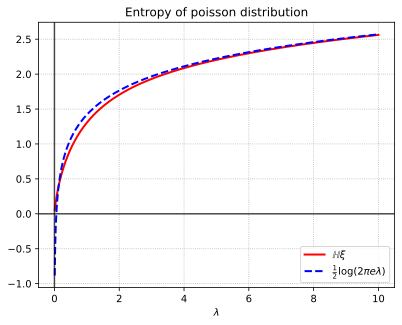

In [57]:
def plot_poisson_entropy():
    ls = np.linspace(0.01, 10, num=1000)
    plt.plot(ls, poisson.entropy(ls), lw=2, c='r', label=r"$\mathbb{H}\xi$")
    plt.plot(ls, 0.5*np.log(2*np.pi*np.e*ls), lw=2, c='b', ls="--", label=r"$\frac{1}{2}\log(2\pi e \lambda)$")
    plt.title("Entropy of poisson distribution")
    plt.grid(ls=":")
    plt.xlabel(r"$\lambda$")
    plt.axhline(c='k', alpha=0.7)
    plt.axvline(c='k', alpha=0.7)
    plt.legend()
    
plot_poisson_entropy()

## Differential entropy

Entropy of a continuous random variable is sometimes called **differential entropy**. Given pdf $p_\xi(x)$, entropy of $\xi$ is calculated by the formula

$$
 \mathbb H\xi = -\int p_{\xi}(x) \log p_{\xi}(x)\, dx.
$$

```{note}
В дальнейшем мы будем использовать одинаковый термин **энтропия** как для дискретных, так и для непрерывных случайных величин, для краткости опуская слово **дифференциальная** в последнем случае. Кроме того, энтропию распределения $p$, заданного через pmf или pdf, будем обозначать $\mathbb H[p]$. Такое обозначение позволяет избежать привязки к случайной величине там, где это излишне. Если $\xi \sim p(x)$, то обозначения $\mathbb H\xi$ и $\mathbb H[p]$ эквивалентны. Также отметим, что энтропию можно записать в виде математического ожидания:

$$
  \mathbb H[p] = \mathbb E_{\xi \sim p(x)} \log\frac 1{p(\xi)}.
$$
```

## Entropy in ML

Entropy is used in {ref}`decision trees <impurity>` as an information criterion.

## KL divergence

**Kullback–Leibler divergence** measures distance between two probability distributions. KL divergence is calculated as

$$\mathbb{KL}(p\vert\vert q) = \sum\limits_k p_k\log\frac{p_k}{q_k}$$

in discrete case and as

$$\mathbb{KL}(p\vert\vert q) = \int p(x)\log \frac{p(x)}{q(x)}dx$$

in continuous one. Another representation:

$$
\mathbb{KL}(p\vert\vert q) = \int p(x)\log \frac 1{q(x)}dx - \int p(x)\log\frac 1{p(x)}dx 
=\underbrace{\mathbb E_{\xi \sim p(x)} \frac 1{\log q(\xi)}}_{\text{cross-entropy}} - \underbrace{\mathbb E_{\xi \sim p(x)} \frac1{\log p(\xi)}}_{\text{entropy}}.
$$

Дивергенция Кульбака-Лейблера в некотором роде играет роль расстояния между распределениями. В 
частности, $\mathbb{KL}(p\vert\vert q)\geqslant 0$, причём дивергенция равна нулю, только если распределения совпадают. Но при этом она не является симметричной: вообще говоря, $\mathbb{KL}(p\vert\vert q)\ne \mathbb{KL}(q\vert\vert p)$.

## Exercises

1. Prove that $0\leqslant \mathbb H\xi \leqslant \log n$ if $\Omega = \{1, 2, \ldots, n\}$. For which distribution do these inequalities turn into equalities?

2. Calculate entropy of $\mathrm{Geom}(p)$ in closed form.

3. Find entropy of $U[a, b]$.

4. Calculate entropy of $\mathcal N(\mu, \sigma^2)$.

5. Calculate entropy of $\mathrm{Exp}(\lambda)$.

6. Calculate entropy of $\mathrm{Gamma}(\alpha, \beta)$.

7. Find KL divergence between $\mathrm{Geom}(p)$ and $\mathrm{Geom}(q)$, $0 < p, q < 1$. Is $\mathbb{KL}(p, p) = 0$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold?

7. Find KL divergence between $p(x) = \mathcal N(x \vert \mu, \sigma^2)$ и $q(x) = \mathcal N(x \vert \nu, \tau^2)$.

8. Find KL divergence between $p(x) = \mathrm{Exp}(x \vert \lambda)$ и $q(x) = \mathrm{Exp}(x \vert \mu)$.